# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

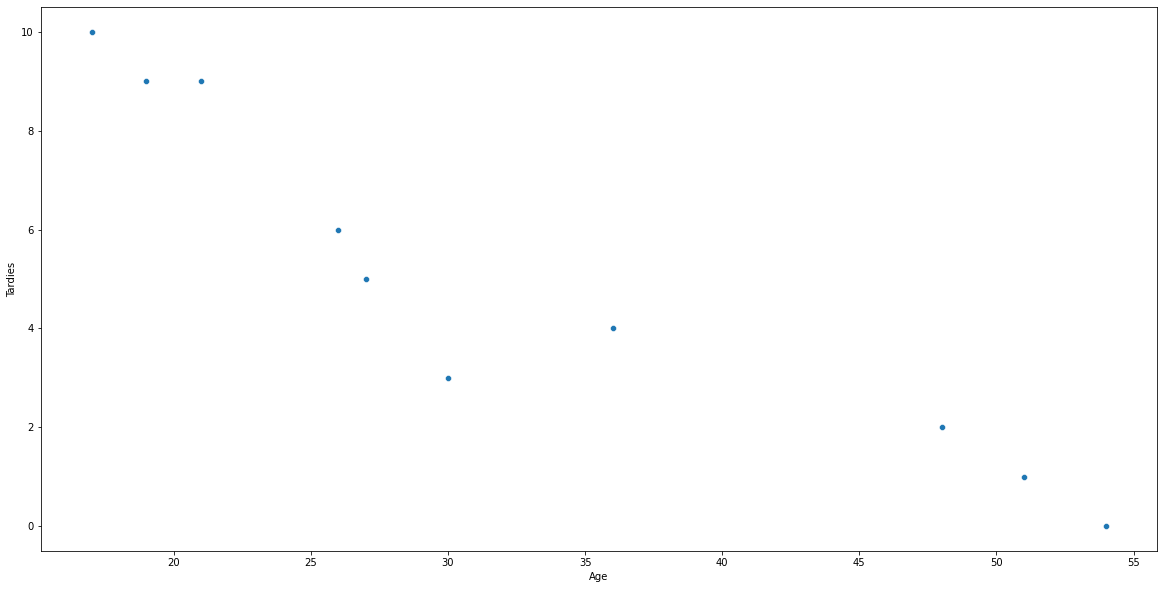

In [2]:
# Your code here.
plt.figure(figsize=(20,10))
sns.scatterplot(data = student_data, x = 'Age', y = 'Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
# This plot suggests that the older a person is, the less likely they are to be late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
print(np.cov(student_data['Age'], student_data['Tardies'])[0,1])
print(student_data['Age'].corr(student_data['Tardies']))

-45.56666666666667
-0.9391626886887122


In [5]:
#Both show a negative correlation between age and tardiness

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
from scipy import stats 
import statsmodels.api as sm

X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

The slope is, b1: -0.24282077091598084
The intercept is, b0: 12.88880336313577


In [7]:
model = sm.OLS(Y,X) 

In [8]:
results = model.fit()

In [9]:
predictions = results.predict(X)

In [10]:
compare = pd.DataFrame({'Actual':Y, 'predicted':predictions})
compare

,Actual,predicted
0,10,1.633022
1,1,4.899065
2,5,2.593623
3,9,2.017262
4,4,3.458164
5,2,4.610885
6,9,1.825142
7,6,2.497563
8,0,5.187245
9,3,2.881803


Plot your regression model on your scatter plot.

(0.0, 50.0)

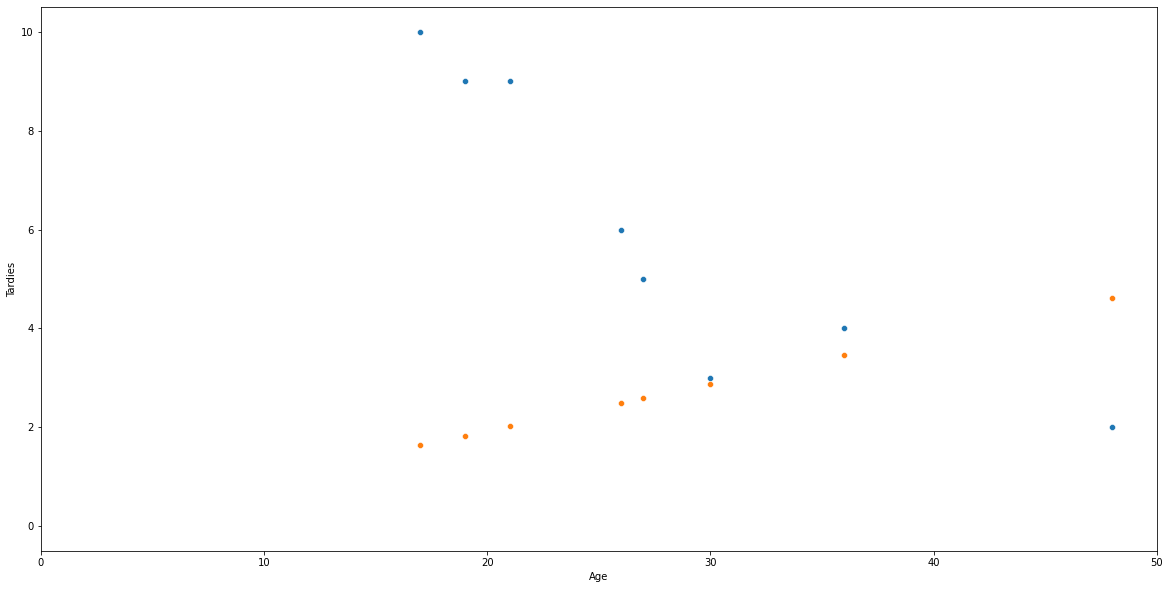

In [27]:
# Your code here.


#student_data['Predicted Tardies'] = compare['predicted']
plt.figure(figsize=(20,10))
sns.scatterplot(data = student_data, x = 'Age', y = 'Tardies')
sns.scatterplot(data = student_data, x = 'Age', y = 'Predicted Tardies')
#paolo: hnady to check from 0
plt.xlim([0,50])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [12]:
# Your response here. 
#This doesnt seem to be a very accurate model as it doesn't follow the same trend as the training data
#Therefore I am not confident in the model. 
#However, according to the original data, age is a good predictor of tardiness, and younger people are more likely to be later.
# paolo: nina, very good idea to plot data+model- I advice to always do it :) 
# paolo: in this case the problem is with the way OLS works- by deafult
# it does not add an intercept to the model, so you are fitting a model with not constant term
# check doc for OLS for more detail 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Import the data
vehicles = pd.read_csv('../data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Your response here. 
vehicles_limited = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles_limited.corr()
#Fuel Barrels per year has the highest correlation with CO2 Emission Grams/Mile

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here. 
Y = vehicles_limited['Fuel Barrels/Year']
X = vehicles_limited['CO2 Emission Grams/Mile']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

The slope is, b1: 0.037002813068274645
The intercept is, b0: 0.02101385249688903


In [17]:
model = sm.OLS(Y,X) 

In [18]:
results = model.fit()

In [19]:
predictions = results.predict(X)

In [20]:
compare = pd.DataFrame({'Actual':Y, 'predicted':predictions})
compare

,Actual,predicted
0,19.388824,19.365512
1,25.354615,25.324131
2,20.600625,20.575856
3,25.354615,25.324131
4,20.600625,20.575856
...,...,...
35947,9.155833,9.038837
35948,9.155833,9.001792
35949,9.155833,9.038837
35950,9.155833,9.112926


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
# Your response here. 
#The most important variables to focus on were Fuel Barrels / Year and Co2 emissions grams / mile
# as these has the highest correlation. 
# I created the regression model and fit it with the existing data
#I am pretty confident with the results, as they turned out close to the original data. 
#Therefore I would be comfortable using this model to test new data. 
#paolo: you could print the regression summary to have the scores, check here- also you could
# plot the difference between predicted and actual for visual inspection
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Fuel Barrels/Year   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.164e+07
Date:                Sat, 31 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:41:47   Log-Likelihood:                         -40184.
No. Observations:               35952   AIC:                                  8.037e+04
Df Residuals:                   35951   BIC:                                  8.038e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CO2 Emission Grams/Mile     0.0370   7.96e-06   4651.565      0.000       0.037       0.037
==============================================================================
Omnibus:                    89537.389   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1020563547.401
Skew:                         -27.458   Prob(JB):                         0.00
Kurtosis:                     826.570   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#paolo: check good work

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [23]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [25]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 